Ce notebook consomme directement les sorties de `merge_data.py` ou `merge_data_streaming.py` (Data/processed/...).
Il calcule des chiffres clés utiles: tailles, manquants, cohérence des IDs, distribution des classes, etc. Et affiche des graphiques afin de visualiser les données.

Importations et chargement des données : 

In [7]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_ROOT = Path("../data")
PROC = DATA_ROOT / "processed"

TRAIN_X_PATH = PROC / "train_merged.csv"
TEST_X_PATH  = PROC / "test_merged.csv"
Y_PATH       = PROC / "y_train_aligned.csv"
Y_SUPP_PATH  = PROC / "y_train_supp_aligned.csv"

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 100)

def load_csv_safe(path: Path, n_preview=5):
    if not path.exists():
        print(f"⚠️ Fichier introuvable: {path}")
        return None
    df = pd.read_csv(path, low_memory=False)
    print(f"✅ {path.name}: {df.shape[0]} lignes × {df.shape[1]} colonnes")
    display(df.head(n_preview))
    return df

train = load_csv_safe(TRAIN_X_PATH)
test  = load_csv_safe(TEST_X_PATH)
y     = load_csv_safe(Y_PATH)
y_s   = load_csv_safe(Y_SUPP_PATH)


✅ train_merged.csv: 12303 lignes × 2105 colonnes


,ID,home_teamLEAGUE,home_teamTEAM_NAME,home_teamTEAM_SHOTS_TOTAL_season_sum,home_teamTEAM_SHOTS_INSIDEBOX_season_sum,home_teamTEAM_SHOTS_OFF_TARGET_season_sum,home_teamTEAM_SHOTS_ON_TARGET_season_sum,home_teamTEAM_SHOTS_OUTSIDEBOX_season_sum,home_teamTEAM_PASSES_season_sum,home_teamTEAM_SUCCESSFUL_PASSES_season_sum,home_teamTEAM_SAVES_season_sum,home_teamTEAM_CORNERS_season_sum,home_teamTEAM_FOULS_season_sum,home_teamTEAM_YELLOWCARDS_season_sum,home_teamTEAM_REDCARDS_season_sum,home_teamTEAM_OFFSIDES_season_sum,home_teamTEAM_ATTACKS_season_sum,home_teamTEAM_PENALTIES_season_sum,home_teamTEAM_SUBSTITUTIONS_season_sum,home_teamTEAM_BALL_SAFE_season_sum,home_teamTEAM_DANGEROUS_ATTACKS_season_sum,home_teamTEAM_INJURIES_season_sum,home_teamTEAM_GOALS_season_sum,home_teamTEAM_GAME_WON_season_sum,home_teamTEAM_GAME_DRAW_season_sum,home_teamTEAM_GAME_LOST_season_sum,home_teamTEAM_SHOTS_TOTAL_season_average,home_teamTEAM_SHOTS_INSIDEBOX_season_average,home_teamTEAM_SHOTS_OFF_TARGET_season_average,home_teamTEAM_SHOTS_ON_TARGET_season_average,home_teamTEAM_SHOTS_OUTSIDEBOX_season_average,home_teamTEAM_PASSES_season_average,home_teamTEAM_SUCCESSFUL_PASSES_season_average,home_teamTEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,home_teamTEAM_SAVES_season_average,home_teamTEAM_CORNERS_season_average,home_teamTEAM_BALL_POSSESSION_season_average,home_teamTEAM_FOULS_season_average,home_teamTEAM_YELLOWCARDS_season_average,home_teamTEAM_REDCARDS_season_average,home_teamTEAM_OFFSIDES_season_average,home_teamTEAM_ATTACKS_season_average,home_teamTEAM_PENALTIES_season_average,home_teamTEAM_SUBSTITUTIONS_season_average,home_teamTEAM_BALL_SAFE_season_average,home_teamTEAM_DANGEROUS_ATTACKS_season_average,home_teamTEAM_INJURIES_season_average,home_teamTEAM_GOALS_season_average,home_teamTEAM_GAME_WON_season_average,home_teamTEAM_GAME_DRAW_season_average,...,away_player_PLAYER_RATING_5_last_match_std_std,away_player_PLAYER_REDCARDS_5_last_match_std_sum,away_player_PLAYER_REDCARDS_5_last_match_std_mean,away_player_PLAYER_REDCARDS_5_last_match_std_std,away_player_PLAYER_SAVES_5_last_match_std_sum,away_player_PLAYER_SAVES_5_last_match_std_mean,away_player_PLAYER_SAVES_5_last_match_std_std,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_sum,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_mean,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_std,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_sum,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_mean,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_std,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_sum,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_mean,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_std,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_sum,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_mean,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_std,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_sum,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_mean,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_std,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_sum,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_mean,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_std,away_player_PLAYER_TACKLES_5_last_match_std_sum,away_player_PLAYER_TACKLES_5_last_match_std_mean,away_player_PLAYER_TACKLES_5_last_match_std_std,away_player_PLAYER_TOTAL_CROSSES_5_last_match_std_sum,away_player_PLAYER_TOTAL_CROSSES_5_last_match_std_mean,away_player_PLAYER_TOTAL_CROSSES_5_last_match_std_std,away_player_PLAYER_TOTAL_DUELS_5_last_match_std_sum,away_player_PLAYER_TOTAL_DUELS_5_last_match_std_mean,away_player_PLAYER_TOTAL_DUELS_5_last_match_std_std,away_player_PLAYER_YELLOWCARDS_5_last_match_std_sum,away_player_PLAYER_YELLOWCARDS_5_last_match_std_mean,away_player_PLAYER_YELLOWCARDS_5_last_match_std_std,away_player_PLAYER_PUNCHES_5_last_match_std_sum,away_player_PLAYER_PUNCHES_5_last_match_std_mean,away_player_PLAYER_PUNCHES_5_last_match_std_std,away_player_PLAYER_LONG_B

✅ test_merged.csv: 25368 lignes × 2101 colonnes


,ID,home_teamTEAM_SHOTS_TOTAL_season_sum,home_teamTEAM_SHOTS_INSIDEBOX_season_sum,home_teamTEAM_SHOTS_OFF_TARGET_season_sum,home_teamTEAM_SHOTS_ON_TARGET_season_sum,home_teamTEAM_SHOTS_OUTSIDEBOX_season_sum,home_teamTEAM_PASSES_season_sum,home_teamTEAM_SUCCESSFUL_PASSES_season_sum,home_teamTEAM_SAVES_season_sum,home_teamTEAM_CORNERS_season_sum,home_teamTEAM_FOULS_season_sum,home_teamTEAM_YELLOWCARDS_season_sum,home_teamTEAM_REDCARDS_season_sum,home_teamTEAM_OFFSIDES_season_sum,home_teamTEAM_ATTACKS_season_sum,home_teamTEAM_PENALTIES_season_sum,home_teamTEAM_SUBSTITUTIONS_season_sum,home_teamTEAM_BALL_SAFE_season_sum,home_teamTEAM_DANGEROUS_ATTACKS_season_sum,home_teamTEAM_INJURIES_season_sum,home_teamTEAM_GOALS_season_sum,home_teamTEAM_GAME_WON_season_sum,home_teamTEAM_GAME_DRAW_season_sum,home_teamTEAM_GAME_LOST_season_sum,home_teamTEAM_SHOTS_TOTAL_season_average,home_teamTEAM_SHOTS_INSIDEBOX_season_average,home_teamTEAM_SHOTS_OFF_TARGET_season_average,home_teamTEAM_SHOTS_ON_TARGET_season_average,home_teamTEAM_SHOTS_OUTSIDEBOX_season_average,home_teamTEAM_PASSES_season_average,home_teamTEAM_SUCCESSFUL_PASSES_season_average,home_teamTEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,home_teamTEAM_SAVES_season_average,home_teamTEAM_CORNERS_season_average,home_teamTEAM_BALL_POSSESSION_season_average,home_teamTEAM_FOULS_season_average,home_teamTEAM_YELLOWCARDS_season_average,home_teamTEAM_REDCARDS_season_average,home_teamTEAM_OFFSIDES_season_average,home_teamTEAM_ATTACKS_season_average,home_teamTEAM_PENALTIES_season_average,home_teamTEAM_SUBSTITUTIONS_season_average,home_teamTEAM_BALL_SAFE_season_average,home_teamTEAM_DANGEROUS_ATTACKS_season_average,home_teamTEAM_INJURIES_season_average,home_teamTEAM_GOALS_season_average,home_teamTEAM_GAME_WON_season_average,home_teamTEAM_GAME_DRAW_season_average,home_teamTEAM_GAME_LOST_season_average,home_teamTEAM_SHOTS_TOTAL_season_std,...,away_player_PLAYER_RATING_5_last_match_std_std,away_player_PLAYER_REDCARDS_5_last_match_std_sum,away_player_PLAYER_REDCARDS_5_last_match_std_mean,away_player_PLAYER_REDCARDS_5_last_match_std_std,away_player_PLAYER_SAVES_5_last_match_std_sum,away_player_PLAYER_SAVES_5_last_match_std_mean,away_player_PLAYER_SAVES_5_last_match_std_std,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_sum,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_mean,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_std,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_sum,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_mean,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_std,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_sum,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_mean,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_std,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_sum,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_mean,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_std,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_sum,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_mean,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_std,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_sum,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_mean,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_std,away_player_PLAYER_TACKLES_5_last_match_std_sum,away_player_PLAYER_TACKLES_5_last_match_std_mean,away_player_PLAYER_TACKLES_5_last_match_std_std,away_player_PLAYER_TOTAL_CROSSES_5_last_match_std_sum,away_player_PLAYER_TOTAL_CROSSES_5_last_match_std_mean,away_player_PLAYER_TOTAL_CROSSES_5_last_match_std_std,away_player_PLAYER_TOTAL_DUELS_5_last_match_std_sum,away_player_PLAYER_TOTAL_DUELS_5_last_match_std_mean,away_player_PLAYER_TOTAL_DUELS_5_last_match_std_std,away_player_PLAYER_YELLOWCARDS_5_last_match_std_sum,away_player_PLAYER_YELLOWCARDS_5_last_match_std_mean,away_player_PLAYER_YELLOWCARDS_5_last_match_std_std,away_player_PLAYER_PUNCHES_5_last_match_std_sum,away_player_PLAYER_PUNCHES_5_last_match_std_mean,away_player_PLAYER_PUNCHES_5_las

✅ y_train_aligned.csv: 12303 lignes × 4 colonnes


,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0


✅ y_train_supp_aligned.csv: 12303 lignes × 2 colonnes


,ID,GOAL_DIFF_HOME_AWAY
0,0,-2.0
1,1,0.0
2,2,-1.0
3,3,1.0
4,4,0.0


Synthèse des tailles :

In [8]:
summary_shapes = []

if train is not None:
    summary_shapes.append(("train_merged", train.shape[0], train.shape[1]))
if test is not None:
    summary_shapes.append(("test_merged",  test.shape[0],  test.shape[1]))
if y is not None:
    summary_shapes.append(("y_train_aligned", y.shape[0], y.shape[1]))
if y_s is not None:
    summary_shapes.append(("y_train_supp_aligned", y_s.shape[0], y_s.shape[1]))

summary_df = pd.DataFrame(summary_shapes, columns=["dataset", "rows", "cols"])
display(summary_df)

,dataset,rows,cols
0,train_merged,12303,2105
1,test_merged,25368,2101
2,y_train_aligned,12303,4
3,y_train_supp_aligned,12303,2


Verification des ids et recouvrement train/tests :

In [ ]:
def id_checks(train_df, test_df):
    if train_df is not None:
        assert train_df["ID"].is_unique, "IDs dupliqués dans le train!"
    if test_df is not None:
        assert test_df["ID"].is_unique, "IDs dupliqués dans le test!"
    if train_df is not None and test_df is not None:
        inter = set(train_df["ID"]).intersection(set(test_df["ID"]))
        print(f"Intersections d'IDs train/test: {len(inter)}")
        if len(inter) > 0:
            print("⚠️ Il y a des IDs en commun entre train et test.")

id_checks(train, test)


🔎 Intersections d'IDs train/test: 0 (doit être 0)


Jointure X_train, Y et Y_supp :

In [ ]:
Xy = None
if train is not None and y is not None:
    Xy = train.merge(y, on="ID", how="left")
    miss_lab = Xy[["HOME_WINS","DRAW","AWAY_WINS"]].isna().any(axis=1).sum()
    print(f"Lignes train sans labels (one-hot) : {miss_lab} / {len(Xy)}")
    if y_s is not None:
        Xy = Xy.merge(y_s, on="ID", how="left")
        miss_diff = Xy["GOAL_DIFF_HOME_AWAY"].isna().sum()
        print(f"Lignes sans GOAL_DIFF_HOME_AWAY : {miss_diff} / {len(Xy)}")
display(Xy.head(3) if Xy is not None else "Xy non disponible")

🎯 Lignes train sans labels (one-hot) : 0 / 12303
➕ Lignes sans GOAL_DIFF_HOME_AWAY : 0 / 12303


,ID,home_teamLEAGUE,home_teamTEAM_NAME,home_teamTEAM_SHOTS_TOTAL_season_sum,home_teamTEAM_SHOTS_INSIDEBOX_season_sum,home_teamTEAM_SHOTS_OFF_TARGET_season_sum,home_teamTEAM_SHOTS_ON_TARGET_season_sum,home_teamTEAM_SHOTS_OUTSIDEBOX_season_sum,home_teamTEAM_PASSES_season_sum,home_teamTEAM_SUCCESSFUL_PASSES_season_sum,home_teamTEAM_SAVES_season_sum,home_teamTEAM_CORNERS_season_sum,home_teamTEAM_FOULS_season_sum,home_teamTEAM_YELLOWCARDS_season_sum,home_teamTEAM_REDCARDS_season_sum,home_teamTEAM_OFFSIDES_season_sum,home_teamTEAM_ATTACKS_season_sum,home_teamTEAM_PENALTIES_season_sum,home_teamTEAM_SUBSTITUTIONS_season_sum,home_teamTEAM_BALL_SAFE_season_sum,home_teamTEAM_DANGEROUS_ATTACKS_season_sum,home_teamTEAM_INJURIES_season_sum,home_teamTEAM_GOALS_season_sum,home_teamTEAM_GAME_WON_season_sum,home_teamTEAM_GAME_DRAW_season_sum,home_teamTEAM_GAME_LOST_season_sum,home_teamTEAM_SHOTS_TOTAL_season_average,home_teamTEAM_SHOTS_INSIDEBOX_season_average,home_teamTEAM_SHOTS_OFF_TARGET_season_average,home_teamTEAM_SHOTS_ON_TARGET_season_average,home_teamTEAM_SHOTS_OUTSIDEBOX_season_average,home_teamTEAM_PASSES_season_average,home_teamTEAM_SUCCESSFUL_PASSES_season_average,home_teamTEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,home_teamTEAM_SAVES_season_average,home_teamTEAM_CORNERS_season_average,home_teamTEAM_BALL_POSSESSION_season_average,home_teamTEAM_FOULS_season_average,home_teamTEAM_YELLOWCARDS_season_average,home_teamTEAM_REDCARDS_season_average,home_teamTEAM_OFFSIDES_season_average,home_teamTEAM_ATTACKS_season_average,home_teamTEAM_PENALTIES_season_average,home_teamTEAM_SUBSTITUTIONS_season_average,home_teamTEAM_BALL_SAFE_season_average,home_teamTEAM_DANGEROUS_ATTACKS_season_average,home_teamTEAM_INJURIES_season_average,home_teamTEAM_GOALS_season_average,home_teamTEAM_GAME_WON_season_average,home_teamTEAM_GAME_DRAW_season_average,...,away_player_PLAYER_SAVES_5_last_match_std_sum,away_player_PLAYER_SAVES_5_last_match_std_mean,away_player_PLAYER_SAVES_5_last_match_std_std,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_sum,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_mean,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_std,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_sum,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_mean,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_std,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_sum,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_mean,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_std,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_sum,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_mean,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_std,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_sum,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_mean,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_std,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_sum,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_mean,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_std,away_player_PLAYER_TACKLES_5_last_match_std_sum,away_player_PLAYER_TACKLES_5_last_match_std_mean,away_player_PLAYER_TACKLES_5_last_match_std_std,away_player_PLAYER_TOTAL_CROSSES_5_last_match_std_sum,away_player_PLAYER_TOTAL_CROSSES_5_last_match_std_mean,away_player_PLAYER_TOTAL_CROSSES_5_last_match_std_std,away_player_PLAYER_TOTAL_DUELS_5_last_match_std_sum,away_player_PLAYER_TOTAL_DUELS_5_last_match_std_mean,away_player_PLAYER_TOTAL_DUELS_5_last_match_std_std,away_player_PLAYER_YELLOWCARDS_5_last_match_std_sum,away_player_PLAYER_YELLOWCARDS_5_last_match_std_mean,away_player_PLAYER_YELLOWCARDS_5_last_match_std_std,away_player_PLAYER_PUNCHES_5_last_match_std_sum,away_player_PLAYER_PUNCHES_5_last_match_std_mean,away_player_PLAYER_PUNCHES_5_last_match_std_std,away_player_PLAYER_LONG_BALLS_5_last_match_std_sum,away_player_PLAYER_LONG_BALLS_5_last_match_std_mean,away_player_PLAYER_LONG_BALLS_5_last_match_std_std,away_player_PLAYER_LONG_BALLS_WON_5_last_match_std_sum,away_player

Distrib classes et baseline :

Distribution des classes (y) :


,HOME_WINS,AWAY_WINS,DRAW
count,5356.000000,3761.000000,3186.000000
ratio,0.435341,0.305698,0.258961


Baseline accuracy (classe majoritaire): 0.435


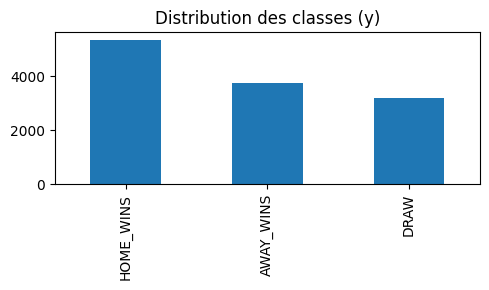

In [11]:
def class_distribution(y_df: pd.DataFrame):
    if y_df is None:
        print("Pas de y_train_aligned, distribution des classes indisponible.")
        return
    cols = ["HOME_WINS","DRAW","AWAY_WINS"]
    for c in cols:
        if c not in y_df.columns:
            print(f"Colonne manquante dans y: {c}")
            return
    counts = {
        "HOME_WINS": int(y_df["HOME_WINS"].sum()),
        "DRAW":      int(y_df["DRAW"].sum()),
        "AWAY_WINS": int(y_df["AWAY_WINS"].sum())
    }
    tot = sum(counts.values())
    dist = pd.Series(counts).sort_values(ascending=False)
    print("Distribution des classes (y) :")
    display(pd.DataFrame({"count": dist, "ratio": dist/tot}).T)

    # baseline "majority class"
    majority_acc = dist.iloc[0] / tot if tot else np.nan
    print(f"Baseline accuracy (classe majoritaire): {majority_acc:.3f}")

    # petit barplot
    plt.figure(figsize=(5,3))
    dist.plot(kind="bar")
    plt.title("Distribution des classes (y)")
    plt.tight_layout()
    plt.show()

if y is not None:
    class_distribution(y)

Stats sur diff de buts (y_supp) : (donc >0 si en  faveur de l'equipe à domicile <0 sinon)

⚽ Stats du différentiel (home-away) :


,goal_diff
count,12303.000000
mean,0.277981
std,1.744147
min,-13.000000
10%,-2.000000
25%,-1.000000
50%,0.000000
75%,1.000000
90%,2.000000
max,10.000000


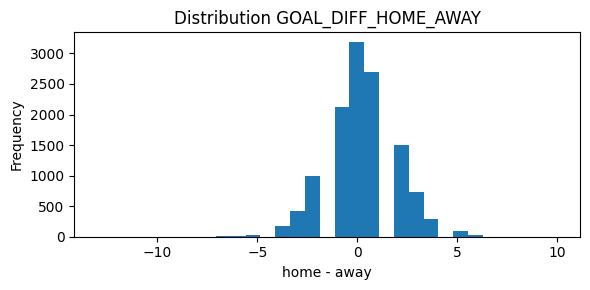

In [ ]:
if y_s is not None and "GOAL_DIFF_HOME_AWAY" in y_s.columns:
    stats = y_s["GOAL_DIFF_HOME_AWAY"].describe(percentiles=[.1,.25,.5,.75,.9]).to_frame("goal_diff")
    display(stats)

    plt.figure(figsize=(6,3))
    y_s["GOAL_DIFF_HOME_AWAY"].plot(kind="hist", bins=31)
    plt.title("Distribution GOAL_DIFF_HOME_AWAY")
    plt.xlabel("home - away")
    plt.tight_layout()
    plt.show()

Types de features et manquants  :

🔧 train: 2104 features | numériques: 2100 | non-num: 4
Colonnes avec manquants (>0) : 236 / 2104


,missing_ratio
home_teamTEAM_INJURIES_5_last_match_std,0.269690
away_teamTEAM_INJURIES_5_last_match_std,0.269284
away_teamTEAM_INJURIES_5_last_match_sum,0.238397
home_teamTEAM_INJURIES_5_last_match_sum,0.238316
away_teamTEAM_INJURIES_5_last_match_average,0.238316
home_teamTEAM_INJURIES_5_last_match_average,0.238235
away_teamTEAM_INJURIES_season_std,0.237828
home_teamTEAM_INJURIES_season_std,0.237666
away_teamTEAM_INJURIES_season_sum,0.159392
away_teamTEAM_INJURIES_season_average,0.159311


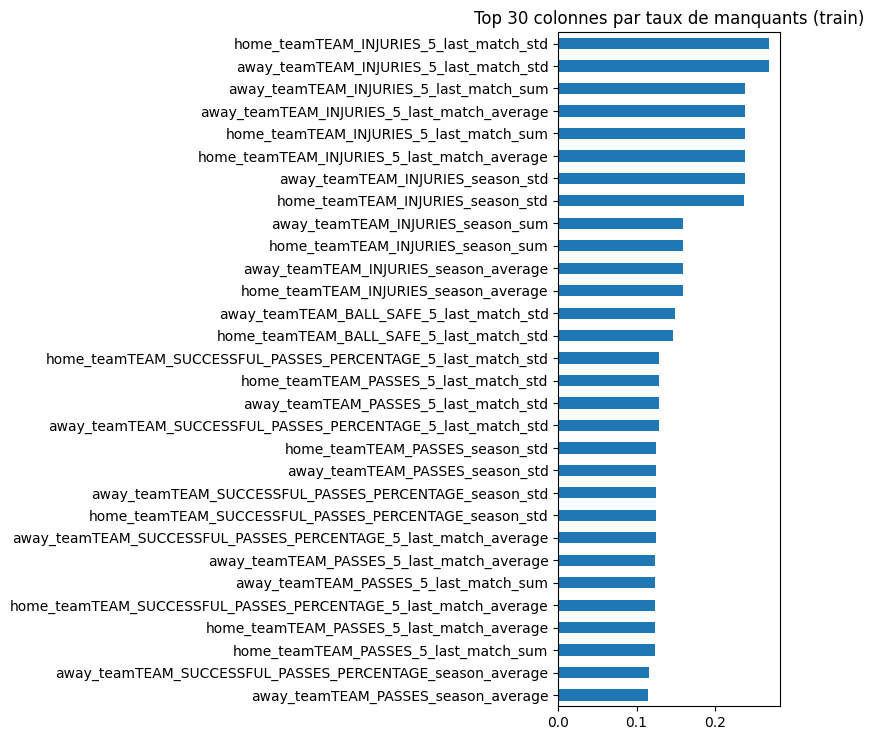

🔧 test: 2100 features | numériques: 2100 | non-num: 0
Colonnes avec manquants (>0) : 261 / 2100


,missing_ratio
away_teamTEAM_INJURIES_5_last_match_std,0.144907
home_teamTEAM_INJURIES_5_last_match_std,0.143251
home_teamTEAM_BALL_SAFE_5_last_match_std,0.114041
away_teamTEAM_BALL_SAFE_5_last_match_std,0.113923
home_teamTEAM_INJURIES_5_last_match_sum,0.106630
home_teamTEAM_INJURIES_5_last_match_average,0.106433
away_teamTEAM_INJURIES_5_last_match_sum,0.106118
away_teamTEAM_INJURIES_5_last_match_average,0.105921
away_teamTEAM_INJURIES_season_std,0.097800
home_teamTEAM_INJURIES_season_std,0.097485


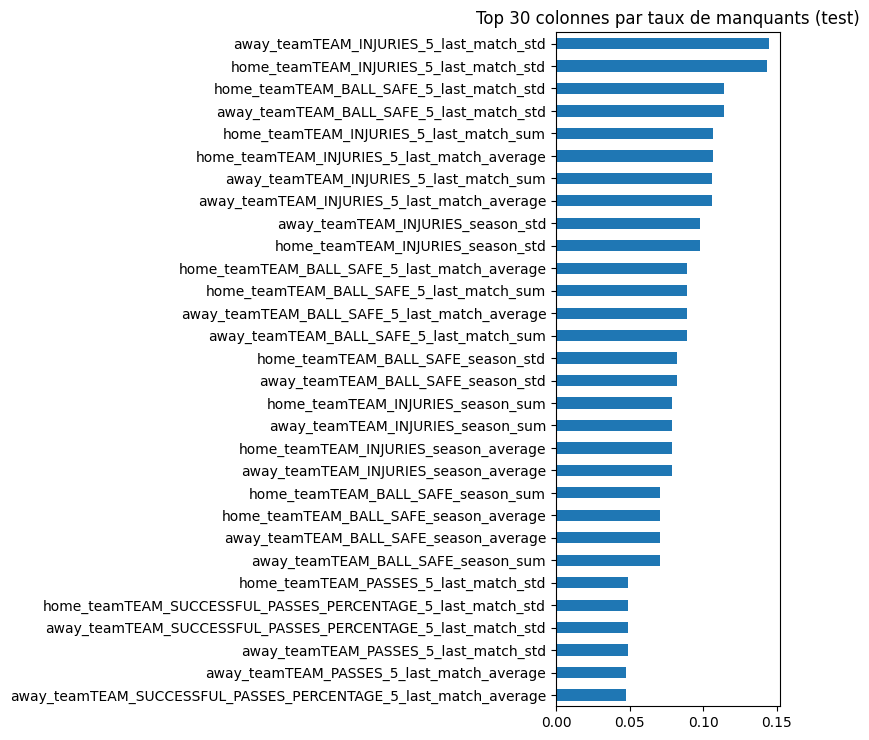

In [ ]:
# %%
def features_overview(df: pd.DataFrame, title="train"):
    if df is None:
        print(f"{title}: dataframe absent.")
        return
    feat_cols = [c for c in df.columns if c != "ID"]
    num_cols = df[feat_cols].select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = [c for c in feat_cols if c not in num_cols]
    print(f"{title}: {len(feat_cols)} features | numériques: {len(num_cols)} | non-num: {len(cat_cols)}")

    miss_ratio = df[feat_cols].isna().mean().sort_values(ascending=False)
    top_na = miss_ratio[miss_ratio > 0].head(30)
    print(f"Colonnes avec manquants (>0) : {int((miss_ratio>0).sum())} / {len(feat_cols)}")
    display(top_na.to_frame("missing_ratio"))

    if len(top_na) > 0:
        plt.figure(figsize=(8, max(3, 0.25*len(top_na))))
        top_na.sort_values().plot(kind="barh")
        plt.title(f"Top {len(top_na)} colonnes par taux de manquants ({title})")
        plt.tight_layout()
        plt.show()

features_overview(train, "train")
features_overview(test, "test")

Variance des features :

In [14]:
def variance_glance(df: pd.DataFrame, title="train"):
    if df is None:
        return
    feat_cols = [c for c in df.columns if c != "ID"]
    num_df = df[feat_cols].select_dtypes(include=[np.number])
    if num_df.empty:
        print(f"{title}: pas de features numériques.")
        return
    var = num_df.var(numeric_only=True).sort_values(ascending=False)
    top = var.head(15).to_frame("variance")
    low = var.tail(15).to_frame("variance").sort_values(by="variance")
    print(f"{title}: top 15 variances")
    display(top)
    print(f"{title}: 15 plus faibles variances")
    display(low)

variance_glance(train, "train")


train: top 15 variances


,variance
home_player_ID_sum,4.866110e+09
away_player_ID_sum,4.809885e+09
home_player_ID_mean,1.261468e+07
away_player_ID_mean,1.261468e+07
home_player_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_sum,2.627241e+05
away_player_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_sum,2.582593e+05
home_player_PLAYER_ACCURATE_PASSES_PERCENTAGE_5_last_match_average_sum,2.578359e+05
away_player_PLAYER_ACCURATE_PASSES_PERCENTAGE_5_last_match_average_sum,2.540685e+05
home_player_PLAYER_RATING_season_average_sum,1.727186e+05
away_player_PLAYER_RATING_season_average_sum,1.712130e+05


train: 15 plus faibles variances


,variance
home_player_PLAYER_LONG_BALLS_WON_5_last_match_average_std,0.0
home_player_PLAYER_SHOTS_OFF_TARGET_5_last_match_average_sum,0.0
away_player_PLAYER_SHOTS_OFF_TARGET_5_last_match_std_sum,0.0
away_player_PLAYER_SHOTS_OFF_TARGET_5_last_match_std_mean,0.0
home_player_PLAYER_LONG_BALLS_season_sum_sum,0.0
home_player_PLAYER_LONG_BALLS_season_sum_mean,0.0
home_player_PLAYER_LONG_BALLS_season_sum_std,0.0
home_player_PLAYER_LONG_BALLS_WON_season_sum_sum,0.0
home_player_PLAYER_LONG_BALLS_WON_season_sum_mean,0.0
home_player_PLAYER_LONG_BALLS_WON_season_sum_std,0.0


Corrélations avec les cibles :

In [ ]:
def corr_with_targets(Xy_df: pd.DataFrame, k=10):
    if Xy_df is None:
        print("Pas de Xy.")
        return
    target_cols = ["HOME_WINS","DRAW","AWAY_WINS"]
    for c in target_cols:
        if c not in Xy_df.columns:
            print("Cibles manquantes dans Xy.")
            return

    feat_cols = [c for c in Xy_df.columns if c not in (["ID"] + target_cols + ["GOAL_DIFF_HOME_AWAY"])]
    num_df = Xy_df[feat_cols].select_dtypes(include=[np.number])
    if num_df.empty:
        print("Pas de features numériques pour corrélation.")
        return

    corrs = {}
    for t in target_cols:
        cor = num_df.corrwith(Xy_df[t]).abs().sort_values(ascending=False)
        corrs[t] = cor.head(k).to_frame(f"|corr| with {t}")
        print(f"Top {k} corrélations (absolues) avec {t}:")
        display(corrs[t])
    return corrs

_ = corr_with_targets(Xy, k=10)


c:\Users\clem7\Clement\ENSC\Projets\IA\football-prediction\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\clem7\Clement\ENSC\Projets\IA\football-prediction\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


🔗 Top 10 corrélations (absolues) avec HOME_WINS:


,|corr| with HOME_WINS
home_teamTEAM_SHOTS_INSIDEBOX_season_average,0.199278
home_teamTEAM_SHOTS_INSIDEBOX_season_sum,0.192106
home_teamTEAM_SHOTS_ON_TARGET_season_average,0.179163
home_teamTEAM_SHOTS_TOTAL_season_average,0.177302
home_teamTEAM_GAME_WON_season_average,0.176881
home_teamTEAM_GOALS_season_sum,0.176667
home_teamTEAM_GAME_WON_season_sum,0.176533
home_teamTEAM_SHOTS_ON_TARGET_season_sum,0.175693
home_teamTEAM_GOALS_season_average,0.175196
home_teamTEAM_BALL_POSSESSION_season_average,0.170843


c:\Users\clem7\Clement\ENSC\Projets\IA\football-prediction\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\clem7\Clement\ENSC\Projets\IA\football-prediction\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


🔗 Top 10 corrélations (absolues) avec DRAW:


,|corr| with DRAW
home_teamTEAM_SHOTS_INSIDEBOX_season_average,0.059728
home_teamTEAM_SHOTS_INSIDEBOX_season_sum,0.055714
home_teamTEAM_SHOTS_INSIDEBOX_5_last_match_average,0.055205
home_player_PLAYER_GOALS_season_sum_std,0.055123
home_teamTEAM_SHOTS_INSIDEBOX_5_last_match_sum,0.054652
home_teamTEAM_SUCCESSFUL_PASSES_season_average,0.054279
home_teamTEAM_SHOTS_ON_TARGET_season_average,0.054113
home_teamTEAM_SHOTS_ON_TARGET_5_last_match_average,0.053784
home_player_PLAYER_GOALS_season_sum_sum,0.053596
home_teamTEAM_SHOTS_ON_TARGET_5_last_match_sum,0.053497


c:\Users\clem7\Clement\ENSC\Projets\IA\football-prediction\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\clem7\Clement\ENSC\Projets\IA\football-prediction\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


🔗 Top 10 corrélations (absolues) avec AWAY_WINS:


,|corr| with AWAY_WINS
away_teamTEAM_SHOTS_INSIDEBOX_season_average,0.174010
away_teamTEAM_PASSES_season_average,0.171571
away_teamTEAM_SHOTS_INSIDEBOX_season_sum,0.169723
away_teamTEAM_SUCCESSFUL_PASSES_season_average,0.167574
away_teamTEAM_SHOTS_ON_TARGET_season_average,0.166302
away_teamTEAM_BALL_POSSESSION_season_average,0.164844
away_teamTEAM_SHOTS_TOTAL_season_average,0.163442
away_teamTEAM_SHOTS_ON_TARGET_season_sum,0.162364
away_teamTEAM_SUCCESSFUL_PASSES_season_sum,0.162073
away_teamTEAM_PASSES_season_sum,0.160997
